<a href="https://colab.research.google.com/github/shizoda/education/blob/main/machine_learning/loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 損失関数（Loss Function）とは？

損失関数は、**モデルの予測と正解の差を定量化するもの**です。この「差」を最小化することこそが、ニューラルネットワークの学習です。

### 役割

1. **学習の指標**:
   - モデルの出力が正解にどれだけ近いかを評価。
2. **最適化**:
   - 勾配を計算し、小さくなる方向へネットワークの重みを更新。



### 代表的な損失関数

1. **MSE Loss（Mean Squared Error）**:
   - 出力とターゲットの「数値的な差」を平方して最小化する。
   - 回帰問題では有効だけど、分類問題では確率分布を正しく扱えないことがある。
   
   
$$
  \text{MSE Loss} = \frac{1}{N} \sum_{i=1}^N \sum_{j=1}^C \left( y_{ij} - \hat{y}_{ij} \right)^2
$$
- $ N$ : サンプル数
- $ C $: クラス数
- $ y_{ij} $: 正解ラベル（one-hot形式）
- $ \hat{y}_{ij} $: モデルの出力（Softmax適用済み確率）

2. **Cross Entropy Loss**:
   - 確率分布の「誤差」を直接計算する。
   - 出力が正解クラスに近づくほどロスが小さくなり、効率的に学習が進む。

   $$
   \text{Cross Entropy Loss} = - \frac{1}{N} \sum_{i=1}^N \sum_{j=1}^C y_{ij} \log \hat{y}_{ij}
   $$


---

### 分類タスクでの損失関数
分類タスクでは、出力を **確率分布** として扱うのが一般的です。確率分布とは、**ある事象が起こる確率を示す分布**のことです。分類タスクでは、モデルの出力（**ロジット**）をSoftmax関数に通すことで、各クラスの確率を計算します。

この確率分布を用いて、正解クラスが予測される確率を最大化する方向に学習を進めます。

### Softmax関数

Softmaxはロジット（未正規化スコア）を確率に変換する関数で、次のように定義されます：
$$
\hat{y}_j = \frac{\exp(z_j)}{\sum_{k=1}^C \exp(z_k)}
$$
- $ z_j $: クラス$ j $ のロジット（モデルの出力）
- $ C $: クラス数
- $ \hat{y}_j $: クラス $ j $ が正解である確率

この計算により、Softmaxの出力は次の特性を持ちます：
1. 各クラスの確率は $0 $〜$ 1 $ の範囲。
2. 全クラスの確率の合計は $ 1 $ になる。

### 確率分布として扱うことのメリット

分類タスクで確率分布を扱うことで、以下のような利点があります：

1. **出力の解釈が明確**：
   - モデルの出力を確率として解釈できるため、「このクラスが正解である可能性は何％か」という具体的な理解が可能です。

2. **正解クラスを最大化する設計が可能**：
   - 損失関数（例：Cross Entropy Loss）は、確率分布を直接扱うことで、正解クラスの確率を1に近づける方向に学習を進めます。

3. **間違いの程度を考慮可能**：
   - 予測が完全に間違っている場合（例：正解クラスの確率が極端に低い）ほど、損失が大きくなるため、モデルは間違いをより強く修正しようとします。

4. **クラス間の重要度を調整可能**：
   - Softmax出力にクラス重みを導入することで、クラス間の不均衡にも対応できます。

### 具体例をもとに両者を比較
モデルの出力（ロジット）：$ z = [2.0, 1.0, 0.1] $

Softmax後の確率分布：$ \hat{y} = [0.7, 0.2, 0.1] $

この出力は次のように解釈できます：
- クラス0が正解である確率は **70%**。
- クラス1が正解である確率は **20%**。
- クラス2が正解である確率は **10%**。

正解がクラス0である場合、**Cross Entropy Loss**はクラス0の確率 $ \hat{y}_0 = 0.7 $ をさらに高めるように学習を進めます。これは、正解クラスの確率を最大化するという**明確な目標**を持つため、分類タスクにおいて非常に効率的です。

一方で、**MSE Loss**もSoftmax後の確率分布を扱うことで、「正解クラスの確率を1に近づける」という学習を行えます。ただし、以下の点で学習効率が劣る場合があります：

1. **全クラスの誤差を等しく考慮**：  
   MSE Lossはすべてのクラスについて誤差を計算するため、正解クラス以外の確率（例：$ \hat{y}_1, \hat{y}_2 $）の寄与が学習を鈍らせることがあります。

2. **勾配が線形的に減少**：  
   MSE Lossでは、確率の差が小さくなると勾配も小さくなるため、正解クラスの確率が高い場合に学習速度が遅くなります。

このように MSE LossはSoftmax出力を使って分類タスクにも適用できますが、**Cross Entropy Lossのように確率分布を最大化する設計がないため、学習が遅くなることが多い**です。このため、分類タスクではCross Entropy Lossが一般的に選ばれます。


### 課題１

- ロジットに対してソフトマックスを適用し、値を表示してください。
- クロスエントロピーロスを実装し、値を表示してください。

In [4]:
import torch
import torch.nn.functional as F

# ロジット（Softmax適用前の出力）の例
logits = torch.tensor([[3.2, 1.6, 0.2], [0.3, 2.6, 0.2]])

# softmax を実装する
softmax_predictions =

SyntaxError: invalid syntax (<ipython-input-4-000b829d86eb>, line 8)

In [5]:
# 正解ラベル（one-hot形式）
targets_one_hot = torch.tensor([[1, 0, 0], [0, 0, 1]])  # 正解ラベル（one-hot形式）

# 正解ラベル（インデックス形式）も定義
targets_index = torch.tensor([0, 2])  # クラス0, クラス2が正解

# MSE Loss
mse_loss = F.mse_loss(softmax_predictions, targets_one_hot)
print(f"MSE Loss: {mse_loss.item()}")

# Cross Entropy Loss
# 自分で実装する。自分で書いてもいいし、PyTorch を使用しても可

NameError: name 'torch' is not defined

### 課題２

iris の分類において、Cross Entropy Loss を使えるように実装してください。
また、その様子を観察してください。

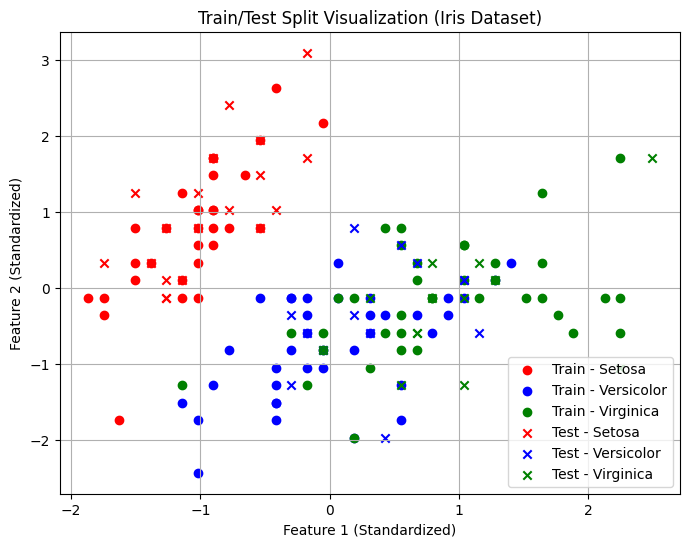

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

# Iris データセットの読み込み
iris = datasets.load_iris()
X, y = iris.data, iris.target  # 3クラス: 0, 1, 2

# 特徴量を2次元に限定（Sepal Length, Sepal Width）
X = X[:, :2]

# データの標準化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# データをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# サンプル点の可視化
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c="red", marker="o", label="Train - Setosa")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c="blue", marker="o", label="Train - Versicolor")
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], c="green", marker="o", label="Train - Virginica")
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c="red", marker="x", label="Test - Setosa")
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c="blue", marker="x", label="Test - Versicolor")
plt.scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1], c="green", marker="x", label="Test - Virginica")
plt.title("Train/Test Split Visualization (Iris Dataset)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend()
plt.grid()
plt.show()


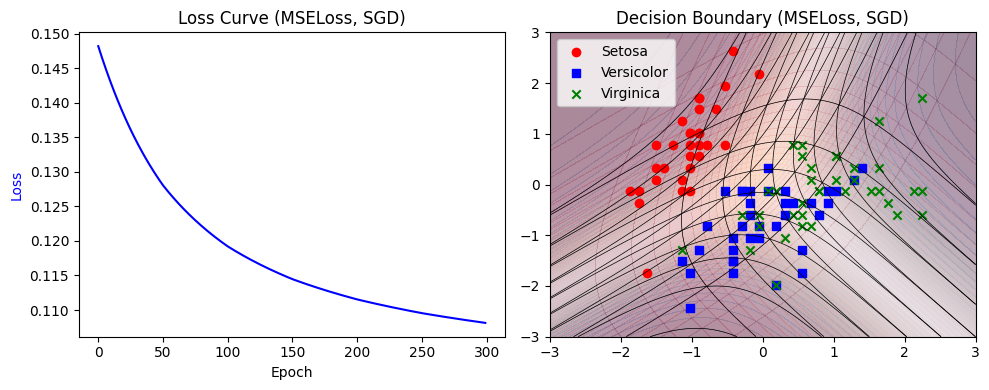

In [7]:
# データをTensorに変換
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # マルチクラス分類用
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# シンプルなMLPモデル
model = nn.Sequential(
    nn.Linear(2, 3),  # 特徴量数: 2, 出力: 3（3クラス分類）
    nn.Softmax(dim=1)  # 出力を確率分布に変換
)

# 損失関数のリスト
loss_functions = {
    # "CrossEntropyLoss":   # マルチクラス交差エントロピー
    "MSELoss": nn.MSELoss()                     # 平均二乗誤差（Softmax後）
}

# オプティマイザのリスト
optimizers = {
    "SGD": lambda: optim.SGD(model.parameters(), lr=0.1),
}

# トレーニング関数
def train(criterion_name, optimizer_name):
    criterion = loss_functions[criterion_name]  # 損失関数を選択
    optimizer = optimizers[optimizer_name]()    # オプティマイザを選択
    scheduler = StepLR(optimizer, step_size=50, gamma=0.9)  # 学習率スケジューラ
    losses = []  # ロスを記録するリスト

    for epoch in range(300):
        optimizer.zero_grad()
        y_pred = model(X_train_tensor)

        # MSEの場合はone-hotエンコーディングが必要
        if criterion_name == "MSELoss":
            y_train_one_hot = torch.nn.functional.one_hot(y_train_tensor, num_classes=3).float()
            loss = criterion(y_pred, y_train_one_hot)
        else:
            loss = criterion(y_pred, y_train_tensor)

        loss.backward()
        optimizer.step()
        scheduler.step()  # 学習率を更新

        # 各エポックでのロスを記録
        losses.append(loss.item())

    return losses  # ロスのリストを返す

# トレーニングと可視化
for criterion_name in loss_functions.keys():
    for optimizer_name in optimizers.keys():
        model.apply(lambda m: m.reset_parameters() if hasattr(m, "reset_parameters") else None)  # 重み初期化
        losses = train(criterion_name, optimizer_name)  # トレーニング

        # 横並びのグラフ作成
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))

        # 学習曲線を左側にプロット
        ax1 = axes[0]
        ax1.plot(losses, label="Loss", color="blue")
        ax1.set_xlabel("Epoch")
        ax1.set_ylabel("Loss", color="blue")
        ax1.set_title(f"Loss Curve ({criterion_name}, {optimizer_name})")

        # 決定境界を右側にプロット（ヒートマップ＆等高線）
        ax2 = axes[1]
        xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
        grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
        preds = model(grid).detach().numpy()  # 各クラスの確率分布
        for class_idx in range(3):
            class_scores = preds[:, class_idx].reshape(xx.shape)  # クラスごとのスコア
            ax2.contourf(xx, yy, class_scores, levels=50, cmap="RdBu", alpha=0.2)
            ax2.contour(xx, yy, class_scores, levels=10, colors="black", linewidths=0.5)
        ax2.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c="red", marker="o", label="Setosa")
        ax2.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c="blue", marker="s", label="Versicolor")
        ax2.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], c="green", marker="x", label="Virginica")
        ax2.set_title(f"Decision Boundary ({criterion_name}, {optimizer_name})")
        ax2.legend()

        # レイアウト調整して表示
        fig.tight_layout()
        plt.show()


### クラス間の不均衡への対応

分類タスクでは、データの分布がクラス間で不均衡な場合があります。このような場合、標準的なCross Entropy Lossでは、サンプル数の多いクラス（多数派）が優先され、少数派クラスの正確な学習が難しくなります。

### Weighted Cross Entropy

クラス間の不均衡を補正するために、クラスごとに異なる重みを与える **Weighted Cross Entropy** が有効です。重み付きCross Entropyの式は以下の通りです：

$$
\text{Weighted Cross Entropy Loss} = -\frac{1}{N} \sum_{i=1}^N w_{y_i} \log(p_{i, y_i})
$$

- $N$: サンプル数
- $y_i$: サンプル$i$の正解クラス
- $p_{i, y_i}$: サンプル$i$の正解クラス$y_i$に対する予測確率
- $w_{y_i}$: クラス$y_i$の重み

クラスの重み$w_{y}$は、通常以下のように設定されます：
$$
w_{y} = \frac{1}{n_y}
$$
ここで、$n_y$はクラス$y$に属するサンプル数です。これにより、少数派クラスの影響が増強され、学習が進むようになります。



In [8]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
from torch.utils.data import random_split

# デバイス設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# assert device.type == "cuda", "CUDA が利用できません！GPU 環境で実行してください。"

# データセットの準備
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# クラスごとの使用率を定義
ratios = [0.5, 0.2, 0.1, 0.1, 0.05, 0.02, 0.01, 0.01, 0.005, 0.005]

# クラスごとのインデックスを抽出
indices_per_class = [[] for _ in range(10)]
for idx, (_, label) in enumerate(train_dataset):
    indices_per_class[label].append(idx)

# 使用率に基づいてインデックスをサンプリング
imbalanced_indices = []
for class_idx, ratio in enumerate(ratios):
    n_samples = int(len(indices_per_class[class_idx]) * ratio)
    imbalanced_indices.extend(indices_per_class[class_idx][:n_samples])


# インバランスなデータセットを作成
imbalanced_train_dataset = Subset(train_dataset, imbalanced_indices)

# train と validation に分割（validation は 10%）
train_size = int(0.9 * len(imbalanced_train_dataset))
val_size = len(imbalanced_train_dataset) - train_size
imbalanced_train_dataset, val_dataset = random_split(imbalanced_train_dataset, [train_size, val_size])

# DataLoader を作成
trainloader = DataLoader(imbalanced_train_dataset, batch_size=64, shuffle=True)
valloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 分割の結果を確認
print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

100%|██████████| 170M/170M [00:04<00:00, 39.3MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Training dataset size: 50000
Validation dataset size: 500
Test dataset size: 10000


教師データのサンプルを表示（クラスバランス確認）:


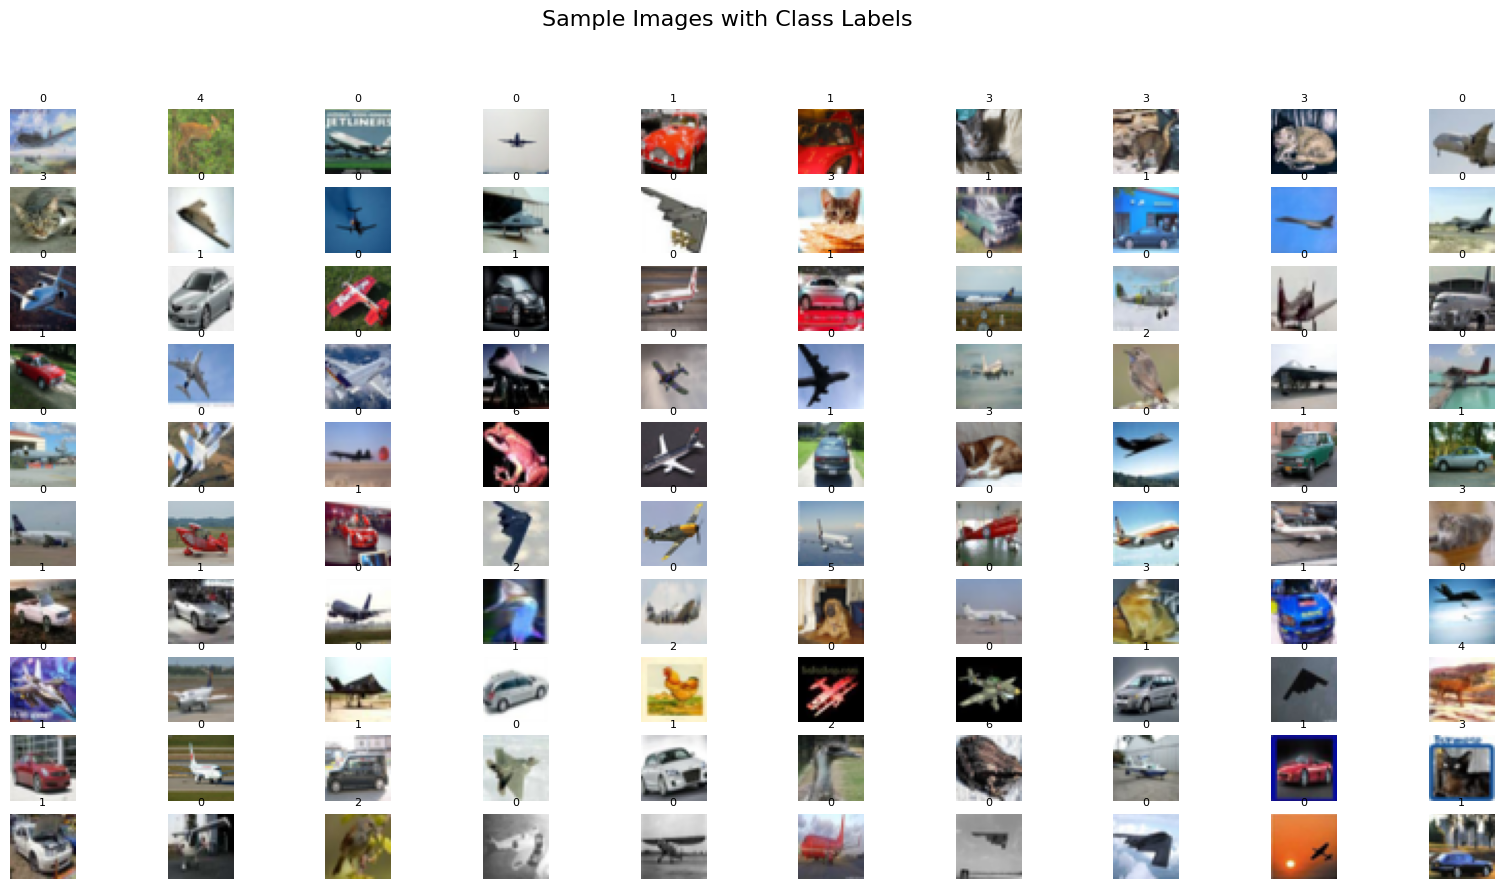

In [9]:
# バランス確認用のサンプル画像を表示
def show_samples(dataset, num_samples=100):
    loader = DataLoader(dataset, batch_size=num_samples, shuffle=True)
    images, labels = next(iter(loader))
    images = images[:num_samples]
    labels = labels[:num_samples]

    plt.figure(figsize=(20, 10))
    for i in range(num_samples):
        plt.subplot(10, 10, i + 1)
        plt.imshow(images[i].permute(1, 2, 0) * 0.5 + 0.5)  # デノーマライズ
        plt.axis("off")
        plt.title(labels[i].item(), fontsize=8)
    plt.suptitle("Sample Images with Class Labels", fontsize=16)
    plt.show()

# サンプル画像を表示して確認
print("教師データのサンプルを表示（クラスバランス確認）:")

show_samples(imbalanced_train_dataset)

### 課題３

まず最後まで実行し、様子を確認します。

その上でクロスエントロピー損失関数に、クラスのバランスを考慮するように変更してみましょう。

In [10]:
# クロスエントロピー損失関数
criterion = nn.CrossEntropyLoss()

 # Adam オプティマイザ
optimizer = optim.Adam(net.parameters(), lr=0.001)


# モデルの定義
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# モデルのインスタンス化
net = SimpleCNN().to(device)
print(net)

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


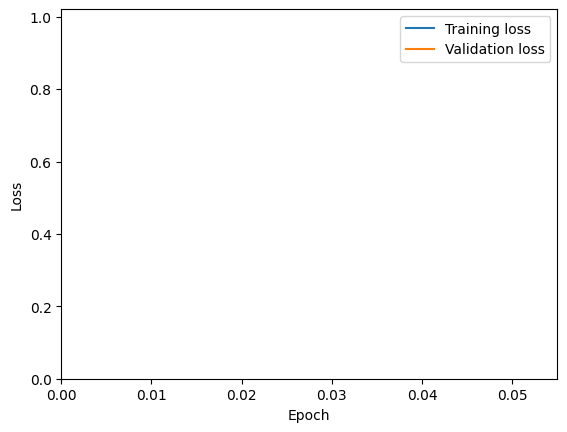

Epoch: 1
Train loss     :  1.0174952762227663
Validation loss:  0.948287345468998


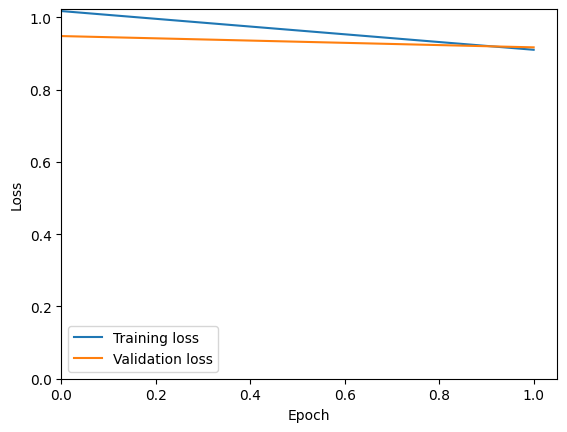

Epoch: 2
Train loss     :  0.910340214279336
Validation loss:  0.9170611798763275


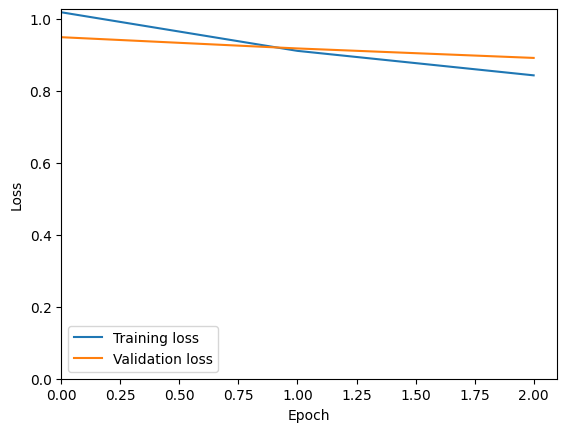

Epoch: 3
Train loss     :  0.8423654164226961
Validation loss:  0.8907491490244865


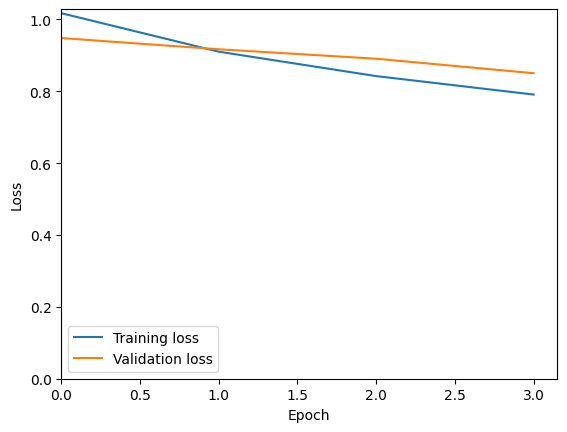

Epoch: 4
Train loss     :  0.7910011024542258
Validation loss:  0.8503629490733147


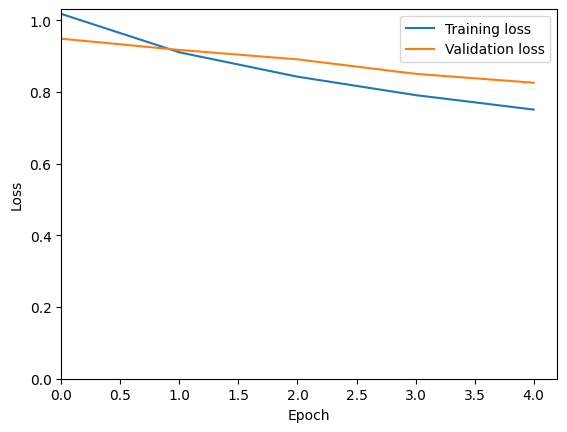

Epoch: 5
Train loss     :  0.7506695431722722
Validation loss:  0.8255674764513969


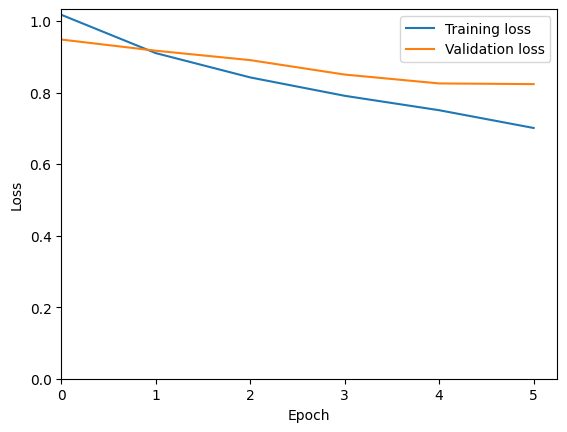

Epoch: 6
Train loss     :  0.7010142811587159
Validation loss:  0.823634184896946


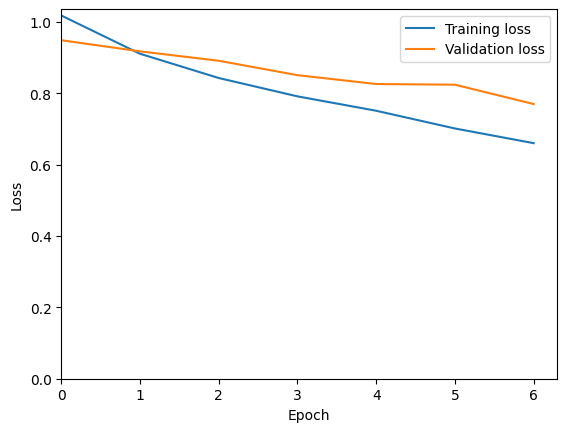

Epoch: 7
Train loss     :  0.6598994005733813
Validation loss:  0.7695050463080406


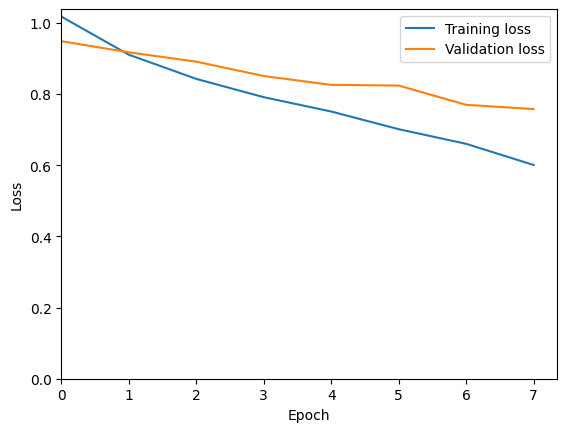

Epoch: 8
Train loss     :  0.6004439399275981
Validation loss:  0.7576025649905205


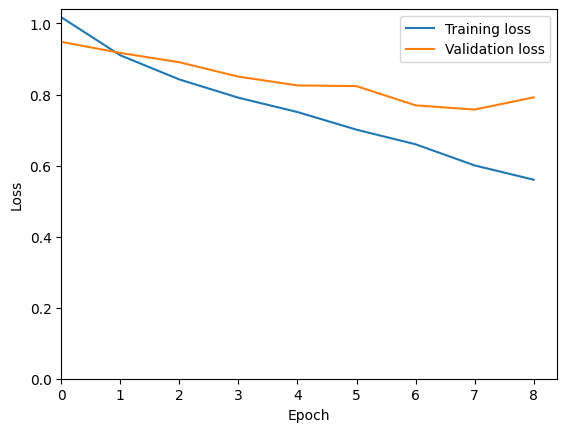

Epoch: 9
Train loss     :  0.5601778592861874
Validation loss:  0.7919886186718941


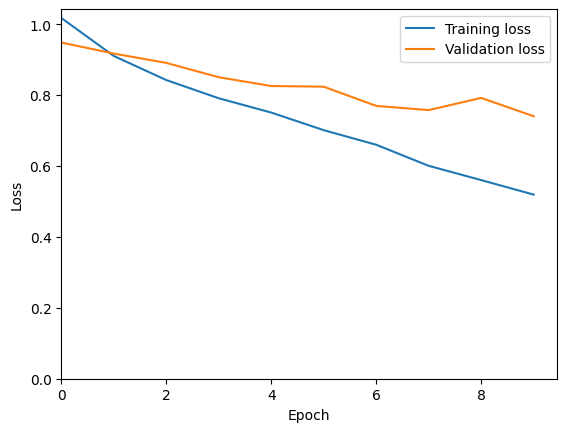

Epoch: 10
Train loss     :  0.5192921266589366
Validation loss:  0.7403640821576118
学習終了


In [12]:
max_epoch = 10     # 最大エポック数
patience = 5       # 改善が見られないエポック数の許容回数
trigger_times = 0  # 改善が見られないエポック数のカウンター

initial_lr = 0.001 # 初期学習率


best_val_loss = float("inf")  # 初期値として無限大を設定
train_losses = []  # 学習データセットの損失を保存するリスト
val_losses = []  # 検証データセットの損失を保存するリスト

# エポック数のループ
for epoch in range(max_epoch):
    running_loss = 0.0

    # 学習データセットからミニバッチを得るたびに…
    for i, data in enumerate(trainloader , 0):
        inputs, labels = data
        inputs = inputs.to(device)  # 入力データをGPUに送る
        labels = labels.to(device)  # ラベルをGPUに送る

        optimizer.zero_grad()  # 勾配の初期化

        outputs = net(inputs)  # ネットワークに入力データを渡して出力を取得
        loss = criterion(outputs, labels)  # 損失を計算
        loss.backward()  # 逆伝播を行い、勾配を計算
        optimizer.step()  # パラメータを更新

        running_loss += loss.item()  # ミニバッチの損失を累積

    # エポックごとの訓練データセットに対する平均損失を計算
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    # 検証データセットに対する損失を計算
    val_loss = 0.0
    net.eval()  # モデルを評価モードに切り替える
    with torch.no_grad():

        # 検証データセットからミニバッチを得るたびに…
        for data in valloader:
            images, labels = data
            images = images.to(device)  # 入力データをGPUに送る
            labels = labels.to(device)  # ラベルをGPUに送る

            outputs = net(images)  # ネットワークに入力データを渡して出力を取得
            loss = criterion(outputs, labels)  # 損失を計算
            val_loss += loss.item()  # 損失を累積

    # エポックごとの検証データセットに対する平均損失を計算
    val_loss = val_loss / len(valloader)
    val_losses.append(val_loss)

    # 損失の値をグラフで表示
    plt.clf()  # 前のグラフをクリア
    plt.plot(train_losses, label='Training loss')  # 訓練データセットの損失
    plt.plot(val_losses, label='Validation loss')  # 検証データセットの損失をプロット
    plt.xlabel('Epoch')  # x軸のラベルを設定
    plt.ylabel('Loss')  # y軸のラベルを設定
    plt.xlim(left=0)  # x軸の表示範囲を設定
    plt.ylim(bottom=0)  # y軸の表示範囲を設定
    plt.legend()  # 凡例を表示
    plt.show()  # グラフを表示

    # エポックごとの損失を出力
    print("Epoch:", epoch + 1)
    print("Train loss     : ", train_loss)
    print("Validation loss: ", val_loss)

    # 検証データセットに対する損失が改善しない場合の処理
    if val_loss < best_val_loss:
        best_val_loss = val_loss  # 最良の検証データセット損失を更新
        trigger_times = 0  # 改善が見られないエポック数をリセット
    else:
        trigger_times += 1  # 改善が見られないエポック数をカウントアップ
        if trigger_times >= patience:  # 許容回数を超えた場合の処理
            print(f"{epoch + 1} エポックで早期終了")  # 早期終了のメッセージを出力
            break  # 学習を終了

print('学習終了')

In [13]:
correct = 0  # 正解数のカウンターを初期化
total = 0  # 全体の画像数のカウンターを初期化

# 訓練モードでの計算を停止（推論モードに切り替える）
with torch.no_grad():
    # テストデータセットに対してループ
    for data in testloader:
        images, labels = data  # ミニバッチごとの画像とラベルを取得
        images = images.to(device)  # GPUに画像を送る
        labels = labels.to(device)  # GPUにラベルを送る

        outputs = net(images)  # ネットワークに画像を入力し、出力を取得
        _, predicted = torch.max(outputs.data, 1)  # 出力の中で最大の値を持つクラスを予測として取得
        total += labels.size(0)  # ミニバッチ内の画像数を全体の画像数に加算
        correct += (predicted == labels).sum().item()  # 予測が正しい場合、正解数をカウントアップ

# 精度を計算して表示
print('テスト画像における精度 %d %%' % (100 * correct / total))

テスト画像における精度 32 %


画像 0


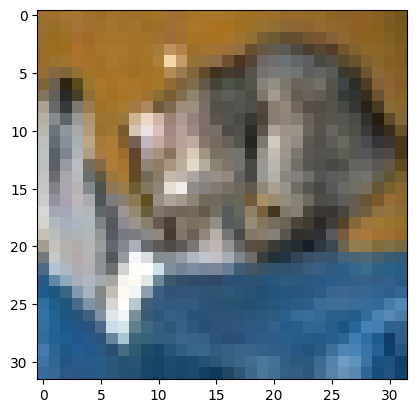

正解： cat
推定： cat

画像 1


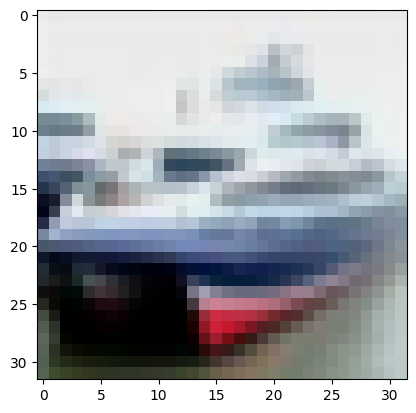

正解： ship
推定： car

画像 2


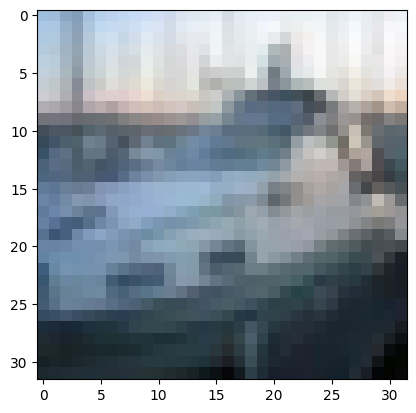

正解： ship
推定： plane

画像 3


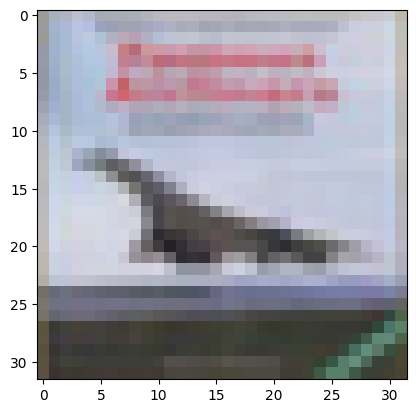

正解： plane
推定： plane

画像 4


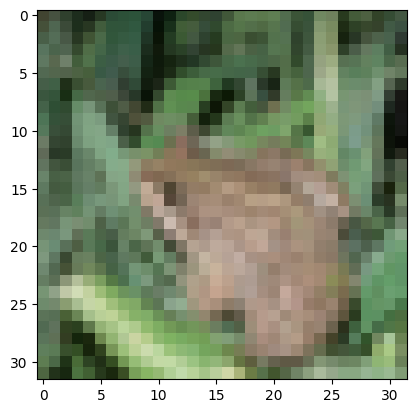

正解： frog
推定： cat



In [18]:
# 画像を表示するための関数
def imshow(img):
    img = img / 2 + 0.5  # 非正規化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# テストデータの画像を表示し、正解と推定値を表示する関数
def visualize_test_predictions(start_idx, end_idx):
    # テストデータローダーを作成
    testloader = torch.utils.data.DataLoader(test_dataset, batch_size=1,
                                             shuffle=False, num_workers=2)

    # 指定したインデックス範囲の画像とラベルを取得
    images, labels = zip(*[(data[0], data[1]) for i, data in enumerate(testloader) if start_idx <= i < end_idx])

    # モデルの予測結果を格納するリストを初期化
    predicted_labels = []

    # 推論モードで計算を停止
    with torch.no_grad():
        # 画像ごとに予測を行う
        for image in images:
            image = image.to(device)  # GPUに画像を送る
            outputs = net(image)  # ネットワークに画像を入力し、出力を得る
            _, predicted = torch.max(outputs, 1)  # 出力の中で最大の値を持つクラスを予測として取得
            predicted_labels.append(predicted.item())  # 予測結果をリストに追加

    # 画像とラベルを表示
    for i in range(len(images)):
        print(f"画像 {start_idx + i}")
        imshow(torchvision.utils.make_grid(images[i]))  # 画像をグリッド形式で表示
        print(f"正解： {classes[labels[i]]}")  # 正解ラベルを表示
        print(f"推定： {classes[predicted_labels[i]]}\n")  # 予測ラベルを表示

# 例: インデックス範囲 0 から 5 の画像を表示
visualize_test_predictions(0, 5)